# Human Activity Recognition model

This dataset contains reading of sensors of a smartphone which records data when the volunteer is lying , standing, sitting, walking,walking upstairs and walking downstairs. The task of the model is to classify the acitivities into different categories on the basis of data present

## Data Description

ATTRIBUTE INFORMATION

 For each record in the dataset it is provided: 

 Triaxial acceleration from the accelerometer (total acceleration)

Triaxial Angular velocity from the gyroscop

A 561-feature vector with time and frequency domain variables

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

#Importing Data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

##Ignore warnings
import warnings
warnings.filterwarnings("ignore")


#Machine learning Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Importing Validation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [2]:
training_data = pd.read_csv('train-1.csv')
testing_data = pd.read_csv('test.csv')
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
testing_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [6]:
training_data.shape,testing_data.shape

((7352, 563), (2947, 563))

In [4]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(training_data)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,7347,float64
tBodyAcc-mean()-Y,0,7352,float64
tBodyAcc-mean()-Z,0,7349,float64
tBodyAcc-std()-X,0,7349,float64
tBodyAcc-std()-Y,0,7351,float64
...,...,...,...
"angle(X,gravityMean)",0,7352,float64
"angle(Y,gravityMean)",0,7352,float64
"angle(Z,gravityMean)",0,7352,float64
subject,0,21,int64


In [8]:
basic_details(testing_data)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,2947,float64
tBodyAcc-mean()-Y,0,2947,float64
tBodyAcc-mean()-Z,0,2947,float64
tBodyAcc-std()-X,0,2947,float64
tBodyAcc-std()-Y,0,2947,float64
...,...,...,...
"angle(X,gravityMean)",0,2947,float64
"angle(Y,gravityMean)",0,2947,float64
"angle(Z,gravityMean)",0,2947,float64
subject,0,9,int64


## DATA PREPROCESSING

In [5]:
train = training_data.drop(columns = ['Activity', 'subject'])

In [6]:
def statistics(data):
    result=[]
    for col in data.columns:
        stats=({"column name":col,
                "Quartile1":data[col].quantile(0.25),
                "Quartile3":data[col].quantile(0.75),
                "mean":data[col].mean(),
                "Variance":data[col].var(),
                "Standard Deviation": data[col].std(),
                "IQR":(data[col].quantile(0.75)-data[col].quantile(0.25)),
                "skewness":data[col].skew(),
                "kurtosis":data[col].kurt()
               })
        result.append(stats)
        #skewness
        if data[col].skew()<-1:
            skewness="highly negative skewed"
        elif -1 < data[col].skew() <-0.5:
            skewness="moderately negative skewed"
        elif -0.5<data[col].skew()<-0:
            skewness="symmetric negative skewed"
        elif 0<data[col].skew()<0.5:
            skewness=" symmetric positive"
        elif 0.5<data[col].skew()<1:
            skewness="moderately positive skewed"
        elif data[col].skew()>1:
            skewness="high positive skewed"
        else:
            skewness="error"
        stats['skewness comment']=skewness
        
           #outlier 
            
        upper=stats["Quartile3"] + (1.5*stats['IQR'])
        lower=stats["Quartile3"] - (1.5*stats['IQR'])
        if len([x for x in data[col] if x <lower or (x>upper)])>0:
            outliercomment="has outlier"
        else:
            outliercomment="no outier"
        stats['outliercomments']=outliercomment
            
    result_df=pd.DataFrame(result)
    return result_df
        

In [7]:
statistics(train)

,column name,Quartile1,Quartile3,mean,Variance,Standard Deviation,IQR,skewness,kurtosis,skewness comment,outliercomments
0,tBodyAcc-mean()-X,0.262975,0.288461,0.274488,0.004937,0.070261,0.025486,-3.448322,50.911391,highly negative skewed,has outlier
1,tBodyAcc-mean()-Y,-0.024863,-0.010783,-0.017695,0.001665,0.040811,0.014080,-0.402995,172.485723,symmetric negative skewed,has outlier
2,tBodyAcc-mean()-Z,-0.120993,-0.097794,-0.109141,0.003208,0.056635,0.023199,1.784469,85.975013,high positive skewed,has outlier
3,tBodyAcc-std()-X,-0.992754,-0.242813,-0.605438,0.201363,0.448734,0.749941,0.677430,-0.865607,moderately positive skewed,has outlier
4,tBodyAcc-std()-Y,-0.978129,-0.034231,-0.510938,0.252652,0.502645,0.943898,0.405892,-1.452671,symmetric positive,no outier
...,...,...,...,...,...,...,...,...,...,...,...
556,"angle(tBodyGyroMean,gravityMean)",-0.482273,0.506187,0.008726,0.370032,0.608303,0.988460,-0.017955,-1.156374,symmetric negative skewed,has outlier
557,"angle(tBodyGyroJerkMean,gravityMean)",-0.376341,0.359368,-0.005981,0.228460,0.477975,0.735709,0.001498,-0.877312,symmetric positive,has outlier
558,"angle(X,gravityMean)",-0.812065,-0.509079,-0.489547,0.261946,0.511807,0.302986,1.399961,0.354498,high positive skewed,has outlier
559,"angle(Y,gravityMean)",-0.017885,0.248353,0.058593,0.088494,0.297480,0.266237,-1.501489,1.363650,highly negative skewed,has outlier


In [235]:
data=statistics(train)

In [236]:
data.shape

(561, 11)

In [237]:
data['skewness comment'].value_counts()

high positive skewed          264
moderately positive skewed    113
 symmetric positive            94
symmetric negative skewed      70
highly negative skewed         13
moderately negative skewed      7
Name: skewness comment, dtype: int64

In [238]:
data['outliercomments'].value_counts()

has outlier    515
no outier       46
Name: outliercomments, dtype: int64

There is 7% outlier in train dataset

## ODT

<AxesSubplot:>

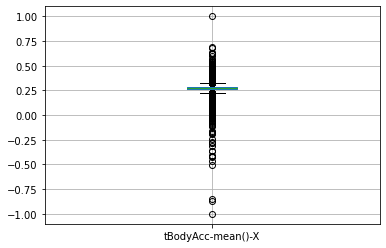

In [167]:
train.boxplot(column = "tBodyAcc-mean()-X")

## Treating outliers with median

In [113]:
train.shape

(7352, 561)

In [8]:
def replaceot(data):
    f=data.shape
    for col in data.columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR= Q3-Q1
        upper= Q3+1.5*(IQR)
        lower= Q1-1.5*(IQR)
        for i in range(f[0]):
            if data[col][i]>upper or data[col][i]<lower:
                data[col][i]=data[col].median()
    return data
        

In [9]:
replaceot(train)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.017220,-0.108678,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.108678,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.108678,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


<AxesSubplot:>

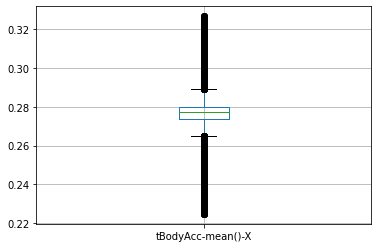

In [10]:
train.boxplot(column = "tBodyAcc-mean()-X")

# Data Visualization

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

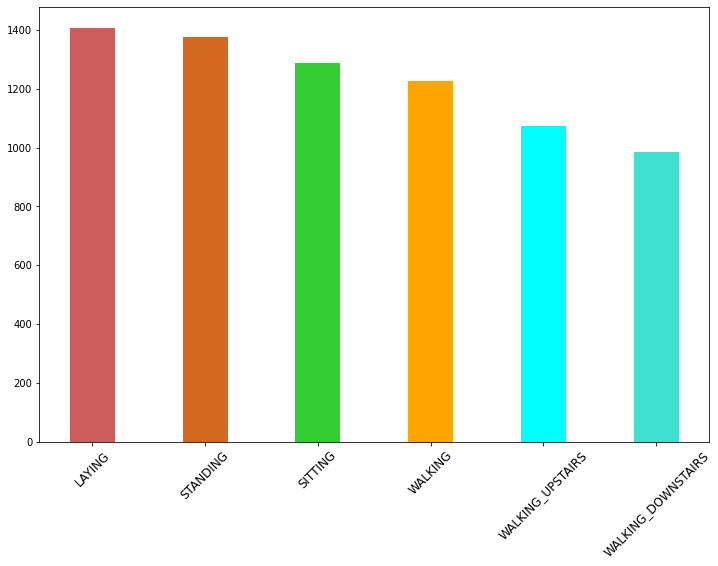

In [23]:
activity = training_data['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts,color=['indianred', 'chocolate', 'limegreen', 'orange', 'cyan','turquoise'],width=0.4)
plt.xticks(rotation=45,fontsize=12)

In [11]:
# Get X and y for training data
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

In [12]:
# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

In [13]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())

([<matplotlib.patches.Wedge at 0x108e01d8>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.1722781621281617, 0.2564447515497634, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.3196536707291756, -1.1566423521509854, 'WALKING_DOWNSTAIRS'),
  Text(1.186310075706812, -0.5316656884513976, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.6838289279080942, 0.14959277173736193, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.18646464125868575, -0.6747080387547414, '14.59'),
  Text(0.7300369696657304, -0.32717888520086, '13.41')])

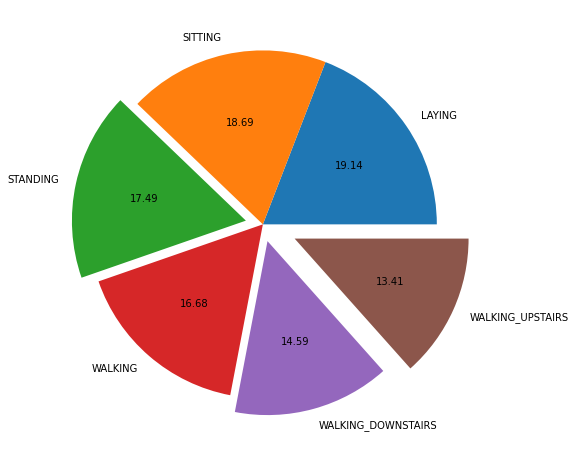

In [14]:
my_explode=(0,0,0.1,0,0.1,0.2)
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f',explode=my_explode)

<BarContainer object of 3 artists>

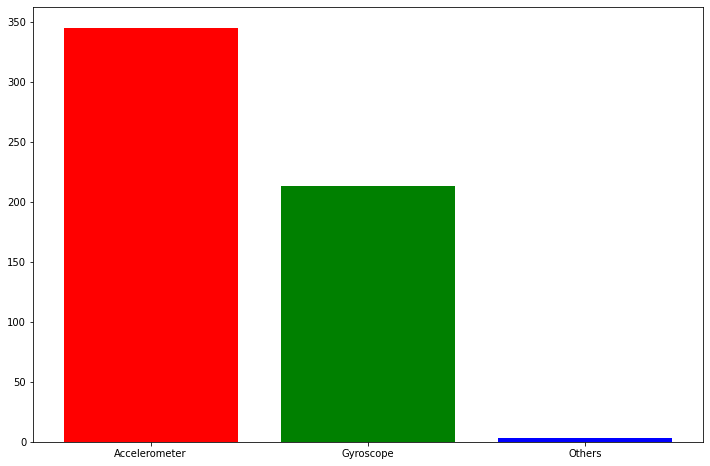

In [15]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

The accelerometer provides the maximum functionality, followed by the gyroscope. The other features are much less.

In [196]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
X_train = slc.fit_transform(X_train)

In [16]:
lr=LogisticRegression()
Rf=RandomForestClassifier()
Dt=DecisionTreeClassifier()
Knn=KNeighborsClassifier()
svc=SVC()

## Function to calculate accuracy and y_predict for every model

In [20]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [30]:
def predict(model,X_test):
    model.fit(X_train,y_train)
    model.predict(X_test)
    return  model.predict(X_test)


In [33]:
y_predict=predict(LogisticRegression(),X_test)

In [34]:
print(classification_report(y_test, y_predict))


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [35]:
y_predict=predict(SVC(),X_test)

In [36]:
print(classification_report(y_test, y_predict))


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.89      0.91       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [37]:
cm= confusion_matrix(y_test, y_predict)


In [38]:
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 438,  51,   0,   0,   2],
       [  0,  29, 503,   0,   0,   0],
       [  0,   0,   0, 488,   3,   5],
       [  0,   0,   0,  10, 384,  26],
       [  0,   0,   0,  20,   0, 451]], dtype=int64)

In [40]:
accuracy_scores = np.zeros(5)

In [41]:
accuracy_scores[0] = get_score(LogisticRegression(),X_train,X_test,y_train,y_test)*100

In [70]:
accuracy_scores[0]

95.82626399728538

In [42]:
accuracy_scores[1] =get_score(SVC(),X_train,X_test,y_train,y_test)*100

In [75]:
accuracy_scores[1]

95.04580929759076

In [82]:
accuracy_scores[2]=get_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)*100

In [83]:
accuracy_scores[3] =get_score(KNeighborsClassifier(),X_train,X_test,y_train,y_test)*100

In [77]:
accuracy_scores[4] =get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)*100

In [84]:
accuracy_scores

array([95.826264  , 95.0458093 , 92.22938582, 90.02375297, 86.22327791])

# Accuracy Plot for every algorithm

In [86]:
accuracy_scores

array([95.826264  , 95.0458093 , 92.22938582, 90.02375297, 86.22327791])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

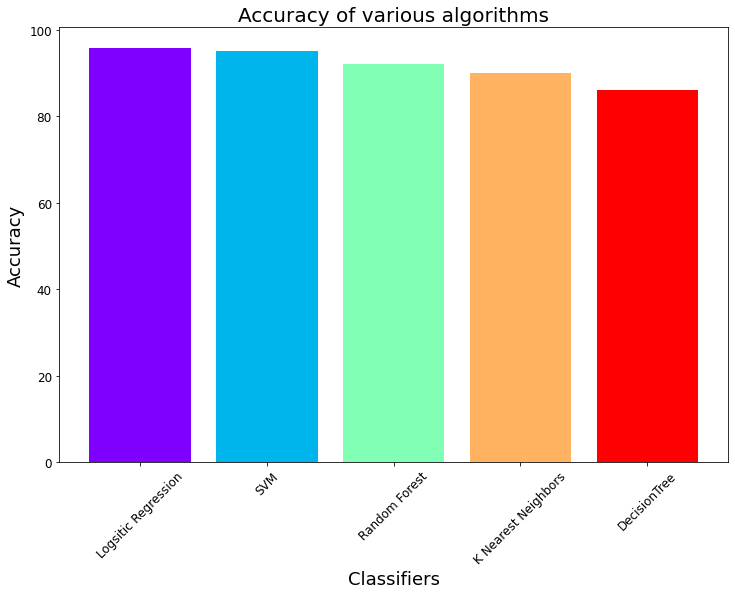

In [87]:
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = [ 'Logsitic Regression','SVM','Random Forest','K Nearest Neighbors','DecisionTree']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)